# Dependencies

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns

# Exercise 1

### Single-Layer Neural Network

In [2]:
def plot_decision_boundary (nn , X, y, title =" Decision Boundary "):
    x_min , x_max = X[:, 0]. min () - 1, X[:, 0]. max () + 1
    x_values = np. linspace (x_min , x_max , 300)

    """
    6 TODO : Calculate the y_values for the decision boundary line based on the
    model ’s weights , the x_values and the model bias .
    7 """

    y_values = (-nn.weights[0]/nn.weights[1]) * x_values - (nn.bias / nn.weights[1])
     
    plt . scatter (X[:, 0], X[:, 1], c=y, s=20 , edgecolor ="k")
    plt . plot ( x_values , y_values , label =" Decision Boundary ")
    plt . xlim (x_min , x_max )
    plt . ylim (X[:, 1]. min () - 1, X[:, 1]. max () + 1)
    plt . title (title)
    plt . legend ()
    plt.show()

In [3]:
def sigmoid(z):
    '''
    Sigmoid activation function
    '''
    sigmoid_output = 1 / (1 + np.exp(-z))
    return sigmoid_output

In [4]:
class SingleLayerNN:
    def __init__(self, input_dimensions):
        # Init random weights and bias
        self.weights = np.random.random(input_dimensions)
        self.bias = 1

    def predict(self, x):
        summed_weight = np.dot(self.weights.T, x) + self.bias
        prediction_output = sigmoid(summed_weight)
        return prediction_output

    def train(self, X, y, epochs, learning_rate):

        learning_rate = learning_rate
        print(f"Learning rate: {learning_rate}")

        # Decision boundary before training        
        plot_decision_boundary(self, X, y)

        for epoch in range(epochs+1):
            if epoch == epochs:
                plot_decision_boundary(self, X, y)
                return
            for i in range(len(X)):
                # Prediction
                y_pred = self.predict(x=X[i])
                # Update rules
                # delta = (y[i] - y_pred)
                delta = (y_pred - y[i])
                derivative = (y_pred * (1 - y_pred))
                dw = (learning_rate * delta) * derivative  * X[i]
                db = (learning_rate * delta) * derivative
                # Update variables
                self.weights = self.weights + dw
                self.bias = self.bias + db

            # Debugging / testing behaviour
            y_pred = self.predict(x=X.T)
            loss = -(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
            avg_loss = np.mean(loss)
            print(f"Average loss: {avg_loss}")

In [5]:
# Generate synthetic data for two classes
n_samples = 100
features_class_0 = np.random.randn(n_samples, 2) + [2, -2] # Class 0
features_class_1 = np.random.randn(n_samples, 2) + [-2, 2] # Class 1

In [6]:
# Define training X, y
X = np.concatenate((features_class_0, features_class_1), axis=0)
y = np.concatenate((np.zeros(n_samples), np.ones(n_samples)), axis=0)
print(X.shape, y.shape)

(200, 2) (200,)


In [7]:
learning_rates = [1.0, 0.1, 0.001, 0.0001, 0.00001]

Learning rate: 1.0


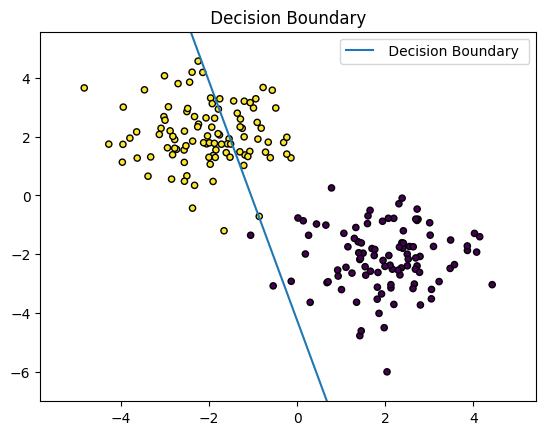

Average loss: 10.236095057198693
Average loss: 11.624294144243555
Average loss: 12.58264109074725
Average loss: 13.35100773436594
Average loss: 14.003407970227903
Average loss: 14.575157776096143
Average loss: 15.08728916418255
Average loss: 15.553594404560135
Average loss: 15.983612316350087
Average loss: 16.384248565859334


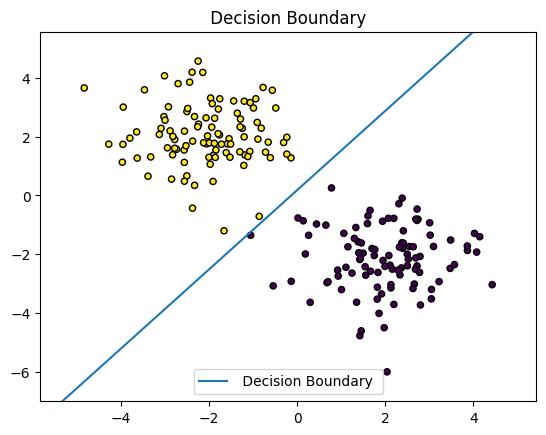

Learning rate: 0.1


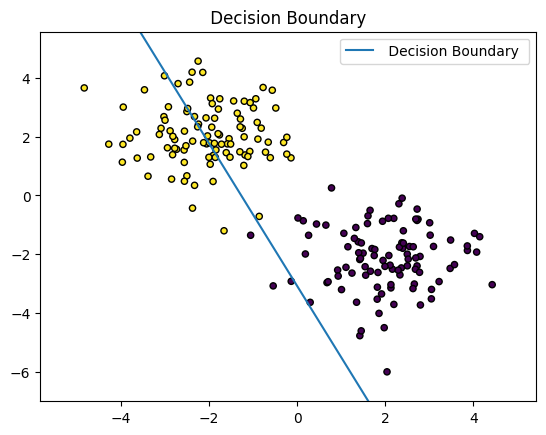

Average loss: 5.924288144515675
Average loss: 6.934420395169739
Average loss: 7.563048006580966
Average loss: 8.029564614390464
Average loss: 8.405368420376357
Average loss: 8.722889715086518
Average loss: 8.999660828176198
Average loss: 9.246256659014582
Average loss: 9.469557854122872
Average loss: 9.674298111352746


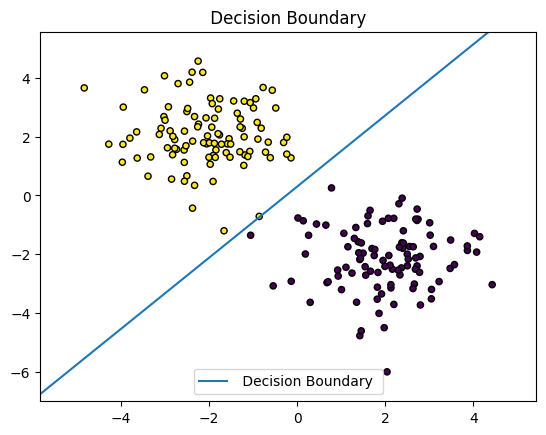

Learning rate: 0.001


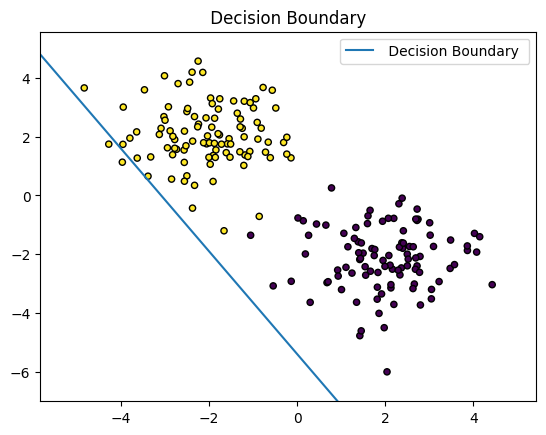

Average loss: 1.0661336688674568
Average loss: 1.1798234251090465
Average loss: 1.3007085706008004
Average loss: 1.42714494352604
Average loss: 1.5571352349930374
Average loss: 1.688533740383362
Average loss: 1.8193011666577714
Average loss: 1.9477164601305252
Average loss: 2.0724850261567354
Average loss: 2.19274354026205


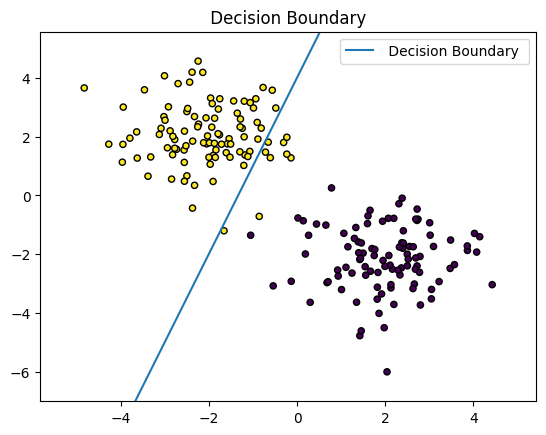

Learning rate: 0.0001


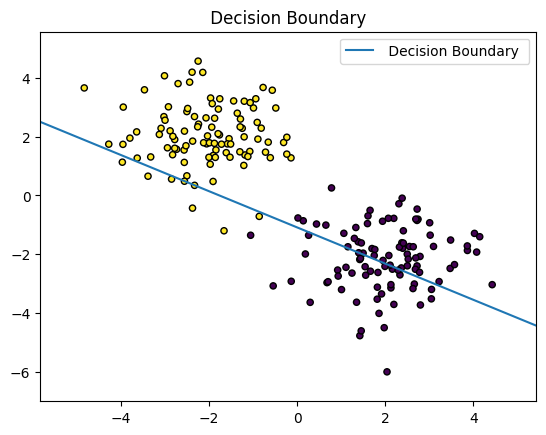

Average loss: 0.5807121177441275
Average loss: 0.5849205064959724
Average loss: 0.5891727484468232
Average loss: 0.5934692286677969
Average loss: 0.597810331542805
Average loss: 0.6021964406265973
Average loss: 0.6066279384992332
Average loss: 0.6111052066168852
Average loss: 0.6156286251589167
Average loss: 0.6201985728711367


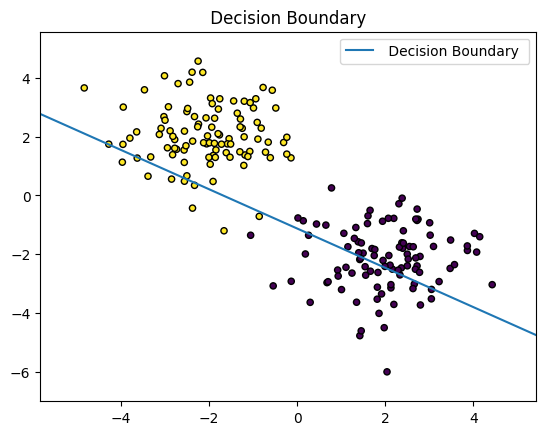

Learning rate: 1e-05


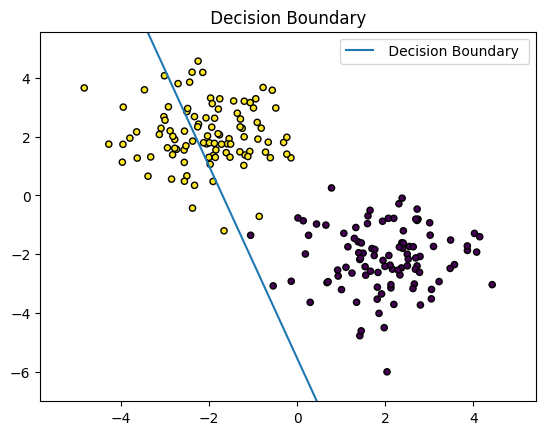

Average loss: 1.3122180888548372
Average loss: 1.3134101948817067
Average loss: 1.3146028282802444
Average loss: 1.3157959874310077
Average loss: 1.3169896707118327
Average loss: 1.3181838764978417
Average loss: 1.319378603161457
Average loss: 1.3205738490724164
Average loss: 1.321769612597782
Average loss: 1.322965892101954


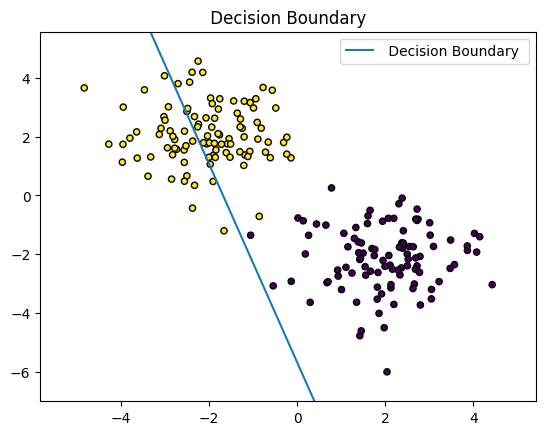

In [8]:
for learning_rate in learning_rates:
    single_layer_nn = SingleLayerNN(input_dimensions=2)
    single_layer_nn.train(X=X, y=y, epochs=10, learning_rate=learning_rate)

Learning rate: 0.1


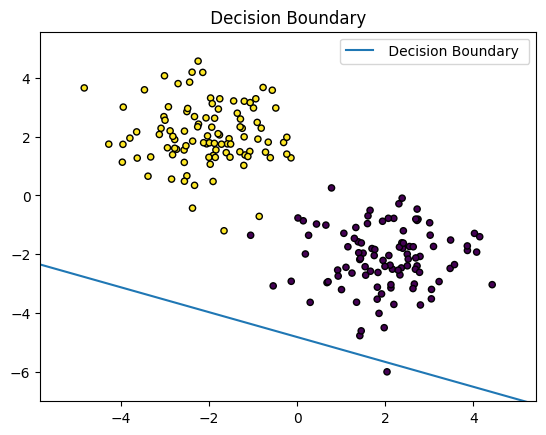

Average loss: 5.853747899024704
Average loss: 6.8677230837769825
Average loss: 7.4934856185375045
Average loss: 7.956012942947873
Average loss: 8.327666922023576
Average loss: 8.641134121084797
Average loss: 8.91403214768315
Average loss: 9.156968872058584
Average loss: 9.376839177850098
Average loss: 9.578383247976019


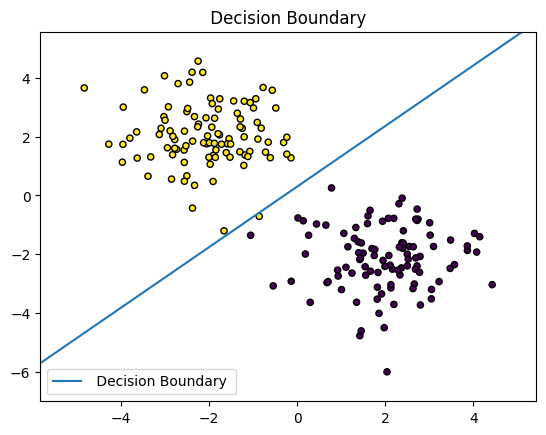

In [9]:
single_layer_nn = SingleLayerNN(input_dimensions=2)
single_layer_nn.train(X=X, y=y, epochs=10, learning_rate=0.1)

# Exercise 2

### Backpropagation

In [50]:
hg = np.divide(-1, 1.14 ** 2)
print(hg)
hf = hg * 1
print(hf)
he = hf * np.exp(-2.00)
print(he)
hd = he * -1.0
print(hd)

hw0 = hd * 1.0
print(hw0)
hc = hd * 1.0
print(hc)

hb = hc * 1.0
print(hb)
ha = hc * 1.0
print(ha)

hw2 = ha * 6.0
print(f"w2: {hw2}")
hx2 = ha * 0.5
print(hx2)

hw1 = hb * -4.0
print(hw1)

hx1 = hb * 0.5
print(hx1)

-0.7694675284702986
-0.7694675284702986
-0.10413610590690421
0.10413610590690421
0.10413610590690421
0.10413610590690421
0.10413610590690421
0.10413610590690421
w2: 0.6248166354414253
0.052068052953452106
-0.41654442362761684
0.052068052953452106


# Exercise 3

### Word Embeddings

#### Load embeddings

In [11]:
# Loading pre-trained embedding model
import gensim.downloader as api
glove_vectors = api.load("glove-wiki-gigaword-100")

#### Finding most similar words 3.1

In [12]:
'''
Finding the most similar words for a given word set
'''
# Defining word set and result set
words_set = ["computer", "laptop", "queen", "king"]
similarity_results = {}

# Finding results for each word
for word in words_set:
    top_5_similar = glove_vectors.most_similar(word, topn=5)
    similarity_results[word] = top_5_similar

In [13]:
for key, val in similarity_results.items():
    print(f"Anchor word: {key}")
    print(f"{val}\n")

Anchor word: computer
[('computers', 0.8751983046531677), ('software', 0.8373122215270996), ('technology', 0.7642159461975098), ('pc', 0.7366448640823364), ('hardware', 0.7290390729904175)]

Anchor word: laptop
[('laptops', 0.8518658876419067), ('computers', 0.7559927105903625), ('phones', 0.7229112386703491), ('portable', 0.7157841324806213), ('desktop', 0.7085692286491394)]

Anchor word: queen
[('princess', 0.7947244644165039), ('king', 0.7507691383361816), ('elizabeth', 0.7355712056159973), ('royal', 0.7065026760101318), ('lady', 0.7044797539710999)]

Anchor word: king
[('prince', 0.7682329416275024), ('queen', 0.7507689595222473), ('son', 0.7020888328552246), ('brother', 0.6985775828361511), ('monarch', 0.6977890729904175)]



#### Vector arithmetics 3.1

In [14]:
'''
Vector arithmetics
'''
king_man_woman = glove_vectors.most_similar(glove_vectors["king"] - glove_vectors["man"] + glove_vectors["woman"])
vehicle_computer_laptop = glove_vectors.most_similar(glove_vectors["vehicle"] - glove_vectors["computer"] + glove_vectors["laptop"])

print(f"king - man + woman\n{king_man_woman[:6]}")
print(f"\nvehicle - computer + laptop\n{vehicle_computer_laptop[:6]}")

king - man + woman
[('king', 0.8551837205886841), ('queen', 0.7834413647651672), ('monarch', 0.6933802366256714), ('throne', 0.6833109259605408), ('daughter', 0.680908203125), ('prince', 0.6713142991065979)]

vehicle - computer + laptop
[('vehicle', 0.758844256401062), ('suv', 0.7331708073616028), ('minivan', 0.7200776934623718), ('parked', 0.7133616805076599), ('jeep', 0.6985746622085571), ('car', 0.6865744590759277)]


#### Cosine similarities 3.2

In [15]:
'''
Cosine similarities
'''
# Import sklearn cosine similarity measure
from sklearn.metrics.pairwise import cosine_similarity

# Unfolding biases
professions = ["engineer", "nurse", "scientist"]
professions_vectors = [glove_vectors[profession] for profession in professions]
names = ["james", "emily", "mohammed", "ling", "juan", "fatima"]
names_vectors = [glove_vectors[name] for name in names]

# professions = ["engineer", "nurse", "scientist"]
# names = ["james", "emily", "mohammed", "ling", "juan", "fatima"]

# similarity_results = {}
# for profession in professions:
#     for name in names:
#         similarity_results[f"({profession, name})"] = cosine_similarity(glove_vectors[profession], glove_vectors[name])

cosine_similarities = cosine_similarity(professions_vectors, names_vectors)
similarity_df = pd.DataFrame(cosine_similarities, columns=names, index=professions)

In [16]:
similarity_df

,james,emily,mohammed,ling,juan,fatima
engineer,0.439558,0.157770,0.258593,0.116367,0.273622,-0.071193
nurse,0.238469,0.362514,0.156243,0.200624,0.167197,0.228209
scientist,0.418299,0.234902,0.286468,0.267843,0.181185,0.092707


#### PCA 3.2

In [17]:
# PCA implementation
# Defining the vectors for PCA
words = ["king", "queen", "man", "woman", "nurse", "engineer"]
word_vectors = [glove_vectors[word] for word in words]

In [18]:
# PCA from sklearn
from sklearn.decomposition import PCA

# Defining pca in 2d (2 components)
pca = PCA(n_components=2)
components = pca.fit_transform(word_vectors)
print(components)

[[ 3.75404532  1.09110453]
 [ 3.17142927 -0.20704364]
 [-0.62538379 -1.56858493]
 [-1.31816933 -2.79988993]
 [-2.63732893 -0.19950647]
 [-2.34459255  3.68392044]]


Text(0.5, 1.0, '2D PCA of Word Embeddings')

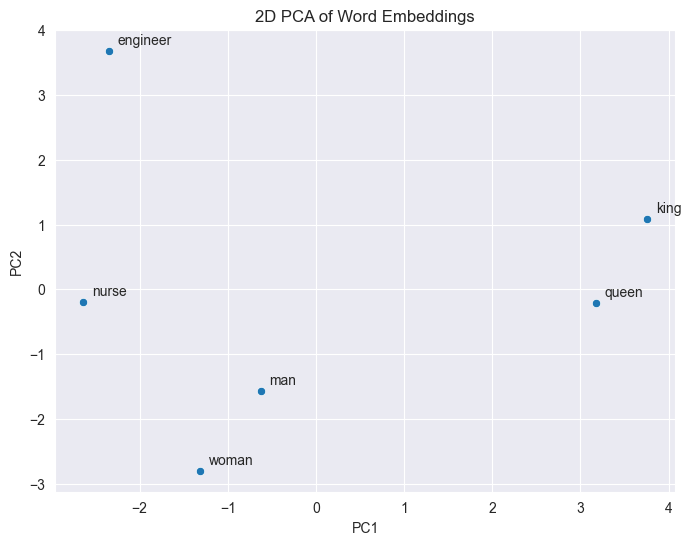

In [19]:
# Defining components
pc1 = components[:, 0]
pc2 = components[:, 1]

# Plotting the components
sns.set_style("darkgrid")
# Plot the words
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(x=pc1, y=pc2)

# for word, pc1, pc2 in zip(words, pc1, pc2):
#     sns.scatterplot(x=pc1, y=pc2, hue=word)
#     # plt.scatter(x=pc1, y=pc2, label=word)

for i, txt in enumerate(words):
    ax.text(pc1[i]+0.1, pc2[i]+0.1, txt)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("2D PCA of Word Embeddings")

# Exercise 4

### Preperation

In [20]:
# Prefixes for testing
prefixes = ["It is not for me to", "Sherlock Holmes is", "The mystery of"]
prefixes

['It is not for me to', 'Sherlock Holmes is', 'The mystery of']

In [21]:
import re
file_path = "text_corpus.txt"


with open(file_path, "r") as f:
        text=f.read()

# Tokenize and remove punctuation
tokenized_text = re.findall(r"[\w’]+|[. ,!?;]", text.lower())
words = [word for word in tokenized_text if word.isalpha()]

In [22]:
import re

def load_and_tokenize(file_path, encoding):
    # Load the file
    with open(file=file_path, encoding=encoding) as f:
        text=f.read()

    # Tokenize and remove punctuation
    tokenized_text = re.findall(r"[\w’]+|[. ,!?;]", text.lower())
    words = [word for word in tokenized_text if word.isalpha()]

    # Return
    return tokenized_text, words
    

In [23]:
file_path = "text_corpus.txt"
tokenized_text, words = load_and_tokenize(file_path=file_path, encoding="utf-8")
print(tokenized_text[:5])
print(words[:5])

['the', ' ', 'project', ' ', 'gutenberg']
['the', 'project', 'gutenberg', 'ebook', 'of']


#### 4.1 - Frequency count (Based on the text corpus)

In [24]:
prefix_list = [prefix.split()[-1] for prefix in prefixes]
prefix_list

['to', 'is', 'of']

In [25]:
for prefix in prefix_list:
    prefix_word_frequencies = {}
    for i in range(1, len(words)):
        current_word = words[i]
        previous_word = words[i-1]

        if previous_word == prefix:
            prefix_word_frequencies[current_word] = prefix_word_frequencies.get(current_word, 0) + 1
        
    max_word = max(prefix_word_frequencies, key=prefix_word_frequencies.get)
    print(f"Current word: '{prefix}', Next word: '{max_word}'")

        

Current word: 'to', Next word: 'the'
Current word: 'is', Next word: 'a'
Current word: 'of', Next word: 'the'


#### 4.2

In [26]:
# Function for generating n_gram_models
def gram_model(n):
    gram_dict = {}
    for i in range(len(words) - n + 1):
        gram = tuple(words[i:i+n-1])
        word = words[i+n-1]

        gram_dict[gram] = gram_dict.get(gram, {word: 0})
        this_dict = gram_dict.get(gram)
        this_dict[word] = this_dict.get(word, 0) + 1

    return gram_dict

In [27]:
# Instantiating models
one_gram_model = gram_model(n=1)
print(one_gram_model)
two_gram_model = gram_model(n=2)
print(two_gram_model)
three_gram_model = gram_model(n=3)
print(three_gram_model)

{(): {'the': 5815, 'project': 89, 'gutenberg': 98, 'ebook': 13, 'of': 2781, 'adventures': 10, 'sherlock': 101, 'holmes': 449, 'this': 533, 'is': 1146, 'for': 752, 'use': 47, 'anyone': 29, 'anywhere': 4, 'in': 1826, 'united': 18, 'states': 26, 'and': 3085, 'most': 95, 'other': 164, 'parts': 6, 'world': 17, 'at': 782, 'no': 400, 'cost': 6, 'with': 877, 'almost': 20, 'restrictions': 2, 'whatsoever': 2, 'you': 1556, 'may': 212, 'copy': 14, 'it': 1716, 'give': 64, 'away': 109, 'or': 275, 're': 4, 'under': 49, 'terms': 25, 'license': 20, 'included': 4, 'online': 4, 'www': 9, 'org': 9, 'if': 282, 'are': 358, 'not': 664, 'located': 7, 'will': 271, 'have': 931, 'to': 2826, 'check': 7, 'laws': 10, 'country': 39, 'where': 125, 'before': 168, 'using': 10, 'title': 3, 'author': 1, 'arthur': 19, 'conan': 2, 'doyle': 2, 'release': 1, 'date': 11, 'march': 7, 'recently': 3, 'updated': 2, 'october': 2, 'language': 2, 'english': 10, 'credits': 1, 'an': 338, 'anonymous': 1, 'volunteer': 2, 'jose': 1, 'men

In [28]:
res = three_gram_model.get(('holmes', 'is'))
print(res)

{'it': 1}


In [29]:
result = one_gram_model.get(())
print(max(result, key=result.get))

the


In [30]:
def predict_next_word(gram_model, gram):
    if gram in gram_model:
        word_counts = gram_model[gram]
        return max(word_counts, key=word_counts.get)
    else:
        print(f"I don't know the next for {gram}...")
        return None

In [31]:
def predict(n):
        for prefix in prefixes:
            print(f"{prefix}")
            sent = prefix.lower()
            for i in range(20):
                if n == 1:
                    current_gram = ()
                else:
                    current_gram = tuple(sent.split()[-n+1:])
                word_next_pred = predict_next_word(gram_model(n=n), current_gram)
                sent = sent + " " + word_next_pred
            print(sent)

In [32]:
print("1-GRAM-MODEL\n")
predict(n=1)

1-GRAM-MODEL

It is not for me to
it is not for me to the the the the the the the the the the the the the the the the the the the the
Sherlock Holmes is
sherlock holmes is the the the the the the the the the the the the the the the the the the the the
The mystery of
the mystery of the the the the the the the the the the the the the the the the the the the the


In [33]:
print("2-GRAM-MODEL\n")
predict(n=2)

2-GRAM-MODEL

It is not for me to


it is not for me to the door and i have been a little more than i have been a little more than i have been
Sherlock Holmes is
sherlock holmes is a little more than i have been a little more than i have been a little more than i have
The mystery of
the mystery of the door and i have been a little more than i have been a little more than i have been


In [34]:
print("3-GRAM-MODEL\n")
predict(n=3)

3-GRAM-MODEL

It is not for me to
it is not for me to be a man who is in a few minutes with his head sunk upon his face was bent downward his
Sherlock Holmes is
sherlock holmes is it then i shall be happy to look at it earnestly drive like the devil he shouted first to gross
The mystery of
the mystery of the house and there was a very serious one to the other side of the house and there was a


#### Pre-trained language model

# Exercise 5

### Image Classification

All kinds of crazy stuff about image classification